# 2. Image Quality Measures

In [17]:
from skimage.color import rgb2gray
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import skimage.exposure
from typing import Dict

<Figure size 640x480 with 0 Axes>

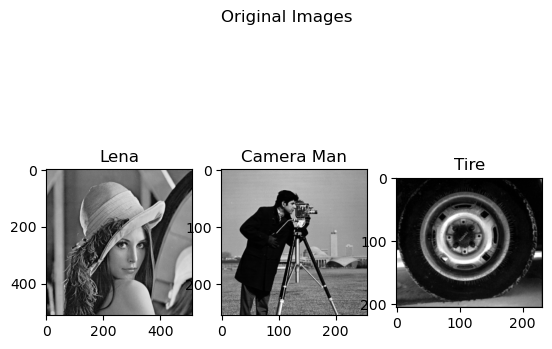

In [18]:
plt.gray() # makes image plots grayscale

lena = rgb2gray(imread('lena.tiff')) * 255
cameraman = imread('cameraman.tiff').astype(np.float64)
tire = imread('tire.tiff').astype(np.float64) / 255.0

def plot_images(images: Dict[str, np.ndarray], title=None):
    """Plots all images in a row"""
    fig = plt.figure()
    for index, (subtitle, image) in enumerate(images.items(), 1):
        ax = fig.add_subplot(1, len(images), index)
        ax.imshow(image)
        ax.title.set_text(subtitle)
    if title:
        fig.suptitle(title)
    plt.show()

plot_images({'Lena': lena, 'Camera Man': cameraman, 'Tire': tire}, 'Original Images')

In [19]:
def PSNR(f: np.ndarray, reference: np.ndarray, MAX_f=255.0):
    """Computes the peak signal-to-noise ratio (PSNR) between two images."""
    f, reference = f.astype(np.float64), reference.astype(np.float64)
    MSE = np.mean((f - reference)**2)
    PSNR_out = 10 * np.log10(MAX_f**2 / MSE)
    return PSNR_out

# 3. Digital Zooming

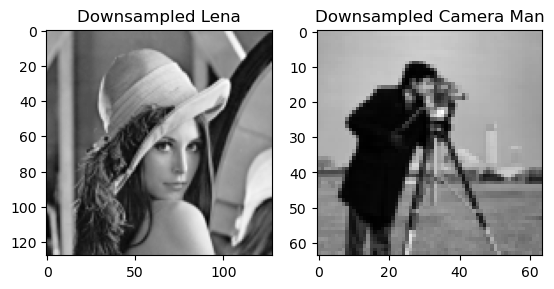

In [20]:
def downsample(f: np.ndarray, step=4, order=1) -> np.ndarray:
    assert len(f.shape) == 2, "Only support 2 dimension arrays"
    new_width = f.shape[0] // step
    new_height = f.shape[1] // step
    # Order shouldn't matter if the shape is divisible by `step` on both axes
    return skimage.transform.resize(f, (new_width, new_height), order=order)
lena_down = downsample(lena)
camera_down = downsample(cameraman)
# Plot
plot_images({'Downsampled Lena': lena_down, 'Downsampled Camera Man': camera_down})


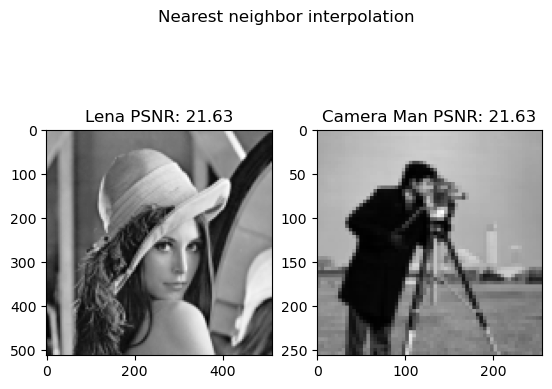

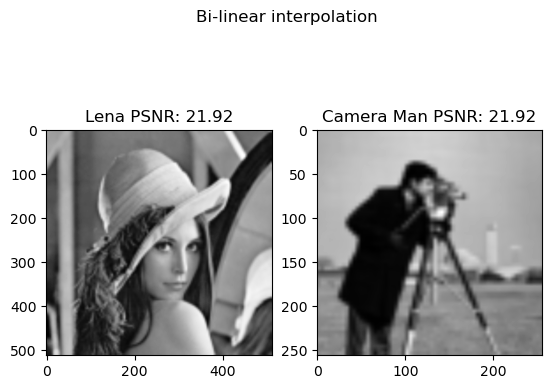

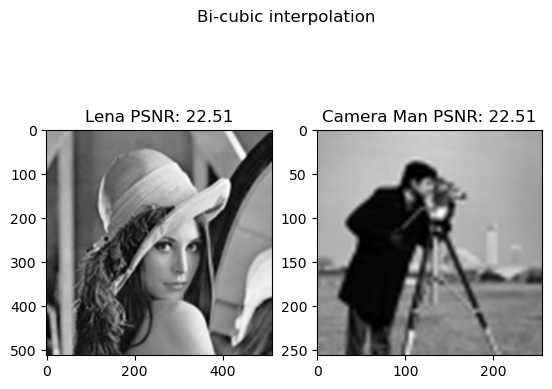

In [21]:
# Upscaling (earest neighbor interpolation, bilinear interpolation, bicubic interpolation)

def upscale(f: np.ndarray, order: int, step=4) -> np.ndarray:
    assert len(f.shape) == 2, "Only support 2 dimension arrays"
    new_width = f.shape[0] * step
    new_height = f.shape[1] * step
    return skimage.transform.resize(f, (new_width, new_height), order=order)


lena_up_0, camera_up_0 = upscale(lena_down, 0), upscale(camera_down, 0)
lena_up_1, camera_up_1 = upscale(lena_down, 1), upscale(camera_down, 1)
lena_up_3, camera_up_3 = upscale(lena_down, 3), upscale(camera_down, 3)

# Plot
plot_images({f'Lena PSNR: {PSNR(camera_up_0, cameraman):.2f}': lena_up_0, f'Camera Man PSNR: {PSNR(camera_up_0, cameraman):.2f}': camera_up_0}, 'Nearest neighbor interpolation')
plot_images({f'Lena PSNR: {PSNR(camera_up_1, cameraman):.2f}': lena_up_1, f'Camera Man PSNR: {PSNR(camera_up_1, cameraman):.2f}': camera_up_1}, 'Bi-linear interpolation')
plot_images({f'Lena PSNR: {PSNR(camera_up_3, cameraman):.2f}': lena_up_3, f'Camera Man PSNR: {PSNR(camera_up_3, cameraman):.2f}': camera_up_3}, 'Bi-cubic interpolation')

# Point Operations for Image Enhancement

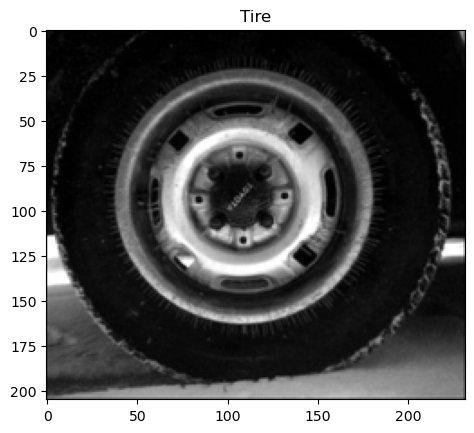

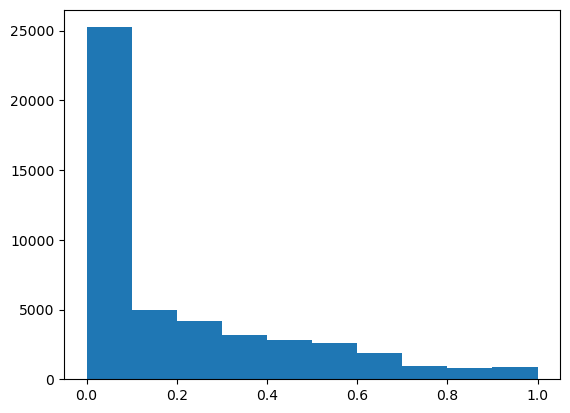

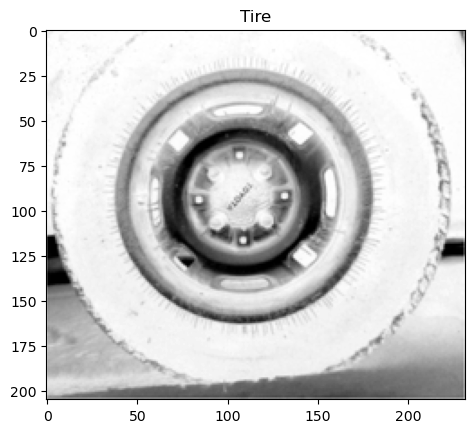

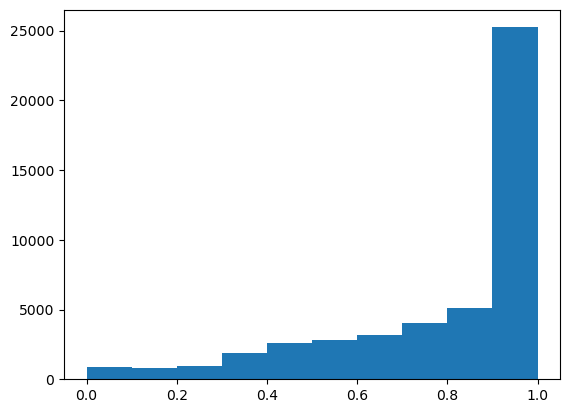

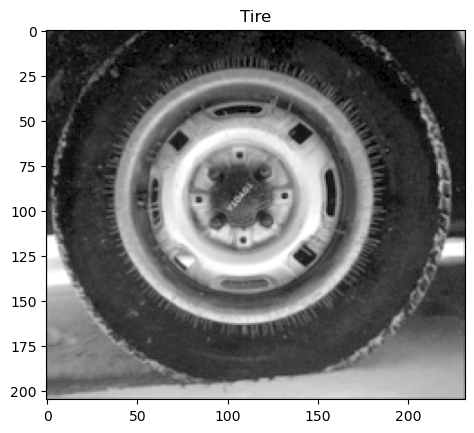

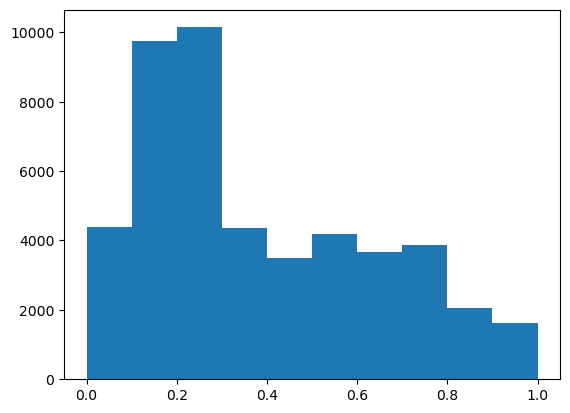

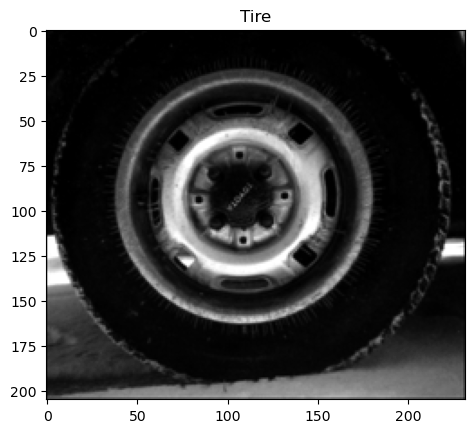

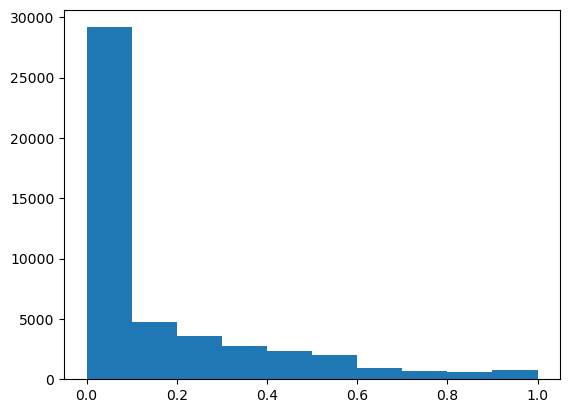

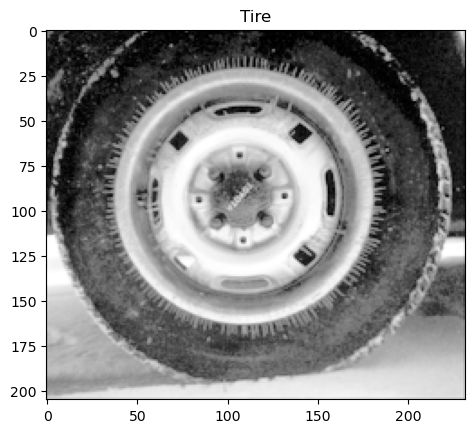

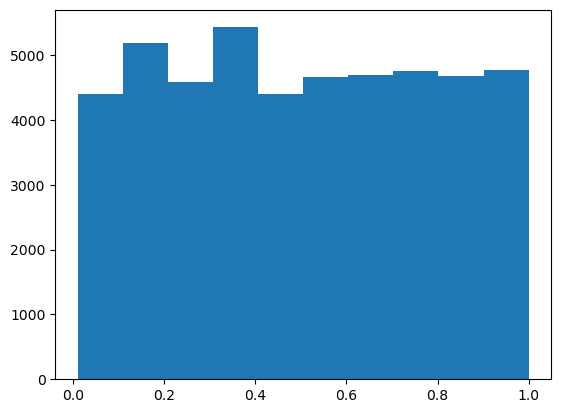

In [35]:
#  Scale the image to the range of [0.0,1.0] by dividing by 255.0. 

# Plot the image as well as the histogram of the image using the plt.hist function. 

plot_images({'Tire': tire})
plt.hist(tire.flatten())
plt.show()

plot_images({'Tire': 1-tire})
plt.hist((1-tire).flatten())
plt.show()

plot_images({'Tire':  tire**0.5})
plt.hist((tire**0.5).flatten())
plt.show()

plot_images({'Tire':  tire**1.3})
plt.hist((tire**1.3).flatten())
plt.show()

equalized = skimage.exposure.equalize_hist(tire)

plot_images({'Tire':  equalized})
plt.hist((equalized).flatten())
plt.show()

In [ ]:

# Now, let us apply two power-law transformations on the tire image, one with an exponent term γ of 0.5 and
# one with an exponent term γ of 1.3. Recall that the power-law transformation i

